In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import requests
from bs4 import BeautifulSoup

url = "https://www.mouthshut.com/product-reviews/Nike-Shoes-reviews-925792626"

# send a request to the website and get the HTML content
response = requests.get(url)
html_content = response.content



In [3]:
# parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

In [4]:
# find the elements with class "rating" and "review"
rating_elements = soup.find_all(class_="spnUpdateDate")
review_elements = soup.find_all(class_="more reviewdata")

#extract the data from the elements
ratings = [element.text for element in rating_elements]
reviews = [element.text for element in review_elements]


In [5]:
!pip install AutoScraper


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from autoscraper import AutoScraper

In [7]:
#for different page replace li with their content and explicitely
#5*****rating
url="https://www.consumeraffairs.com/sporting_goods/nike.html?page={}#sort=recent&filter=5"
l1=["This is a very comfortable shoe to wear,which is made up of good quality and it is very light weight & its really attracts people specially for the blue in colour"]
l3=["best product i've recieved from flpkrt"]
l2=["Trusted ."]
l4=["i bought this pair of shoes from flipkart . i got dis within 2 days. In this price range shoes are really nice. Built Quality of shoe is really heavy ."]
l5=["value for money but the product could have been made available at cheaper rates as other e retailers are offering"]
l6=["the item is very good and comfortable too. the delivered item is as it is displayed in the cart. the prices is reasonable. It is worth buying..."]
l7=["Please intimate me once this product is available in Size 10. i need this pair of shoes and from last 1 month i am tracking this shoe in (white, blue and black) colour. please intimate my email id is anshu85@gmail.com"]
w=[l1,l2,l3,l4,l5,l6,l7]

In [8]:
# review=[]
# for i in range(1,3):
#     url="https://www.flipkart.com/nike-running-shoes-men/product-reviews/itmf3xwzcg3gjy8b?pid=SHODVHH3ERGMYHSH&lid=LSTSHODVHH3ERGMYHSH4HATK1&aid=overall&certifiedBuyer=false&sortOrder=MOST_HELPFUL&page=2"
#     li=wanted_list[i-1]
#     scraper=AutoScraper()
#     res=scraper.build(url,li)
#     print(res)

In [9]:
w

[['This is a very comfortable shoe to wear,which is made up of good quality and it is very light weight & its really attracts people specially for the blue in colour'],
 ['Trusted .'],
 ["best product i've recieved from flpkrt"],
 ['i bought this pair of shoes from flipkart . i got dis within 2 days. In this price range shoes are really nice. Built Quality of shoe is really heavy .'],
 ['value for money but the product could have been made available at cheaper rates as other e retailers are offering'],
 ['the item is very good and comfortable too. the delivered item is as it is displayed in the cart. the prices is reasonable. It is worth buying...'],
 ['Please intimate me once this product is available in Size 10. i need this pair of shoes and from last 1 month i am tracking this shoe in (white, blue and black) colour. please intimate my email id is anshu85@gmail.com']]

**FLIPKART REVIEW**

In [10]:
review=[]
#7 pages of review
for i in range(1,8):
    url="https://www.flipkart.com/nike-running-shoes-men/product-reviews/itmf3xwzcg3gjy8b?pid=SHODVHH3ERGMYHSH&lid=LSTSHODVHH3ERGMYHSH4HATK1&aid=overall&certifiedBuyer=false&sortOrder=MOST_HELPFUL&page={}"
    scraper=AutoScraper()
    l=w[i-1]
    res=scraper.build(url.format(i),l)
    review+=res

In [11]:
print(len(review))

45


**NIKE FROM TRUSTPILOT WEBSITE**

In [12]:
import requests
from bs4 import BeautifulSoup

url = "https://www.trustpilot.com/review/www.nike.com?page=2&stars=4&stars=5"

res = requests.get(url)

soup = BeautifulSoup(res.text, "html.parser")

div_tags = soup.find_all("article")
p=soup.find_all("p",class_="typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn")

print(p[0])

<p class="typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn" data-service-review-text-typography="true">Excelent site and great customer service.<br/>The site is very easy to navigate and the returns are smooth.</p>


In [13]:
rev2=[]
#3,4,5 rated
for i in range(1,43):
    url = "https://www.trustpilot.com/review/www.nike.com?page={}&stars=3&stars=4&stars=5"
    res = requests.get(url.format(i))
    soup = BeautifulSoup(res.text, "html.parser")
    div_tags = soup.find_all("article")
    p=soup.find_all("p",class_="typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn")
    l=[]
    for i in range(len(p)):
        t=p[i].text
        l.append(t)
    rev2+=l
print(len(rev2))
    
    
    

784


In [14]:
# l=[]
# for i in range(len(p)):
#     t=p[i].text
#     l.append(t)
#     print(t)
rev2[700:710]

['5 stars for Yeezis.',
 'I ordered 2 pairs of football boots on a saturday, and they expectedly arrived the following on wednesday. The boots both fit, and both the delivery, order and payment went smooth. Not the first nor the last time I order from Nike.',
 'Nike is the most advanced sneaker company in the word. They mix technologies with fashion as no other.',
 "Nikes are great, I don't know why there are so many negative reviews. I've been using only Nikes, Jordans, sometimes other sneakers like Vans, however, Nike is a benchmark which shows trends and using technologies as no other.",
 'Fastest way to get my apple watch was to buy it from Nike, faster shipping than apple.Very happy!',
 "I ordered 3 pairs of running shoes online and chose to ship them Next Day Air.  I received 2 pairs on time but never got the 3rd pair.  After researching tracking info and email confirmations, I discovered that Nike’s shipping department screwed up.  The tracking #’s emailed to me did not match th

In [15]:
a=rev2[0]

In [16]:
import re
#deleting product no
a = re.sub(r'\. Brilliant customer service.*', '.', a)
rev2[0]=a

print(rev2[0])

Hello,I had returned a product and it has been more than 4 Months and I still have not received my refund, even after repeated reminders. Did not expect this from a company like NIKE. Details are given below. I have been writing to u guys for the last 4 months, but no one is bothered to solve this issue.


In [17]:
import pandas as pd
concatenated_list = review+rev2

df = pd.DataFrame({'feedback': concatenated_list})

In [18]:
df.to_csv("nike_feedback.csv", index=False)

In [19]:
df=pd.read_csv('nike_feedback.csv')

In [20]:
df.head()


,feedback
0,Good comfort.. Good Quality... but i doubt Wea...
1,So I thought of buying this new shoe (supposed...
2,This is a really good product by Nike. Very co...
3,"This is a very comfortable shoe to wear,which ..."
4,"Pleae dont buy, neither looks like a Nike shoe..."


In [21]:
f=df['feedback']
f[0:5]

0    Good comfort.. Good Quality... but i doubt Wea...
1    So I thought of buying this new shoe (supposed...
2    This is a really good product by Nike. Very co...
3    This is a very comfortable shoe to wear,which ...
4    Pleae dont buy, neither looks like a Nike shoe...
Name: feedback, dtype: object

**EDGE CASE FOR FILTERING DATA**

In [22]:
t=["Hello,I had returned a product and it has been more than 4 Months and I still have not received my refund, even after repeated reminders. Did not expect this from a company like NIKE. Details are given below. I have been writing to u guys for the last 4 months, but no one is bothered to solve this issue. Brilliant customer service.ORDER NO\t:     G10091529199 (29th OCT 2022)",
   "Nike shoes are very comfortable.",
   "The shoes look great, but they are expensive.", "I bought a pair of Adidas shoes.","I love my new shoes from Puma."]

df2= pd.DataFrame({"key":t})
print(df2)
# Define keywords that indicate the text is relevant
irrrelevant_keywords = ['Adidas','Burberry','Gucci','Jimmy','Salvatore Ferragamo','Bugatti',
                       'Airwalk','Lacoste','Lee Cooper','Red Tape','Fila','Balenciaga','Puma',
                       'Levis','Tommy Hilfiger','Jordan','Reebok','Woodland',
                       'Sparx','Red Chief','Diesel','Calvin Klein','US Polo']

# Filter out texts that do not contain the relevant keywor,ds
df2 = df2[~df2['key'].apply(lambda x: any([keyword in x for keyword in irrrelevant_keywords]))]


                                                 key
0  Hello,I had returned a product and it has been...
1                   Nike shoes are very comfortable.
2      The shoes look great, but they are expensive.
3                   I bought a pair of Adidas shoes.
4                     I love my new shoes from Puma.


In [23]:
df2

,key
0,"Hello,I had returned a product and it has been..."
1,Nike shoes are very comfortable.
2,"The shoes look great, but they are expensive."


In [24]:
#lets apply on our dataframe

**APPLY CUSTOM EDGE FILTER ON OUR DATA**

In [25]:
print(len(df['feedback']))

829


In [26]:
df_irr=df[df['feedback'].apply(lambda x: any([keyword in x for keyword in irrrelevant_keywords]))]
df = df[~df['feedback'].apply(lambda x: any([keyword in x for keyword in irrrelevant_keywords]))]
print(len(df['feedback']))
print("************irrelevent Data:*********",df_irr)

811
************irrelevent Data:*********                                               feedback
49   Nike do not check their emails, i was sent a s...
63   I already submitted a review about Nike and I ...
89   Free shipping on all orders sets them apart fr...
266  I have ordered Nike running shoes on their off...
350  Hi I’m ordering some Jordan’s for my son and r...
351  Ordered 2 pairs of Jordan Mid's, not heard fro...
408  I ordered a pair of Nike air max 720-818 and N...
446  I don't understand how people despise Nike on ...
486  Excellent!I've ordered a few times and the onl...
551  My first purchase from Nike. Got some Jordan c...
569  Best Equipment In The World For Soccer Product...
642  This review is exclusively for the Jordan bran...
659  I recently visited a local Nike store they ref...
704  These shoes are the best! Good design and high...
707  I purchased the Easter Edition Jordans not kno...
709  Made an order of 2 Jordans and Air Force 1s go...
748  Nikes are great, I

In [27]:
# scraper.set_rule_aliases({'rule_j182':'review'})
# scraper.keep_rules(['rule_j182'])
# #save model
# scraper.save('Nike_review')

**PREPROCESS THE DATA**

In [28]:
import re
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]

    # Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]

    # Join the tokens back into a single string
    preprocessed_text = " ".join(tokens)

    return preprocessed_text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df['preprocessed_text'] = df['feedback'].apply(preprocess_text)

In [30]:
df['preprocessed_text']

0      good comfort good quality doubt weather fabric...
1      thought buying new shoe supposedly new shoe gu...
2      really good product nike comfortable wear look...
3      comfortable shoe wearwhich made good quality l...
4      pleae dont buy neither looks like nike shoes f...
                             ...                        
824    earlier placed serveral orders nikestoredk web...
825    couldnt believe somebody designed trainers ord...
826    ordered items unfortunately fit nike gave full...
827               recieved fantastic pair trainers brand
828     site bomb quite often find things want buy stock
Name: preprocessed_text, Length: 811, dtype: object

In [31]:
pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


**FINDING SENTIMENT OF DATA**

In [32]:

import nltk
nltk.download("vader_lexicon")
from nltk.sentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    sentiment = vader.polarity_scores(text)["compound"]
    return sentiment

df["sentiment_score"] = df['preprocessed_text'].apply(get_sentiment_score)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**LABEL FOR SENTIMENT**

In [33]:
def get_sentiment_score(text):
    sentiment = vader.polarity_scores(text)["compound"]
    if sentiment > 0:
        return ("positive")
    elif sentiment < 0:
        return ("negative")
    else:
        return ("neutral")

df["label"] = df["feedback"].apply(get_sentiment_score)


In [34]:
df['label']

0      negative
1      negative
2      positive
3      positive
4      negative
         ...   
824    negative
825    positive
826    positive
827    positive
828    positive
Name: label, Length: 811, dtype: object

In [35]:
df['sentiment_score']

0      0.7003
1     -0.9137
2      0.9798
3      0.8479
4     -0.2755
        ...  
824   -0.0220
825    0.2263
826    0.8442
827    0.5574
828   -0.4404
Name: sentiment_score, Length: 811, dtype: float64

**ANALYZE SCORE**

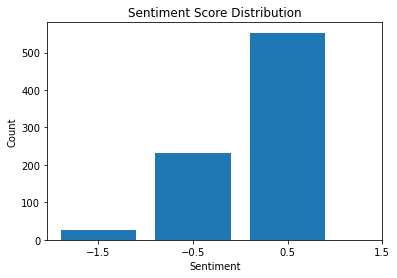

In [36]:
import matplotlib.pyplot as plt

def plot_sentiment_scores(df):
    scores = df["sentiment_score"]
    bins = [-1.5, -0.5, 0.5, 1.5]
    labels = ["Negative", "Neutral", "Positive"]
    
    plt.hist(scores, bins=bins, rwidth=0.8, align="left")
    plt.xticks(bins)
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("Sentiment Score Distribution")
    plt.show()

plot_sentiment_scores(df)


In [37]:
scores = df["sentiment_score"]
labels = ["Negative", "Neutral", "Positive"]
    
negative = [i for i in scores if i <0]
positive = [i for i in scores if i >0]
neutral = [i for i in scores if i ==0]
data = [negative, neutral, positive]
print(positive[0:10])


[0.7003, 0.9798, 0.8479, 0.9042, 0.9231, 0.8173, 0.9771, 0.9584, 0.9364, 0.4767]


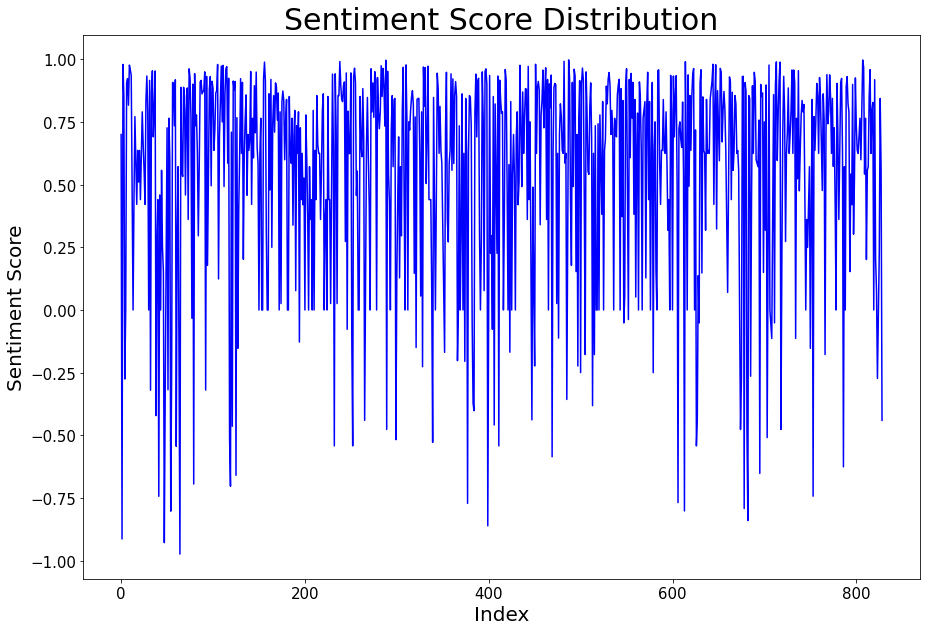

In [38]:
import matplotlib.pyplot as plt
def plot_sentiment_scores(df):
    # Convert the sentiment score column to numeric
    df["sentiment_score"] = pd.to_numeric(df["sentiment_score"], errors='coerce')
    
    # Remove the rows with non-numeric values
    df.dropna(subset=["sentiment_score"], inplace=True)
    
    scores = df["sentiment_score"]
    labels = ["Negative", "Neutral", "Positive"]
    
    negative = [i for i in scores if i <= -0.05]
    neutral = [i for i in scores if i >= -0.05 and i <= 0.05]
    positive = [i for i in scores if i >= 0.05]
    
    data = [negative, neutral, positive]
    fig, ax = plt.subplots(figsize=(15,10))
    scores.plot(kind='line', ax=ax, color='blue')
    ax.set_ylabel("Sentiment Score", fontsize=20)
    ax.set_xlabel("Index", fontsize=20)
    ax.set_title("Sentiment Score Distribution", fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.show()

plot_sentiment_scores(df)




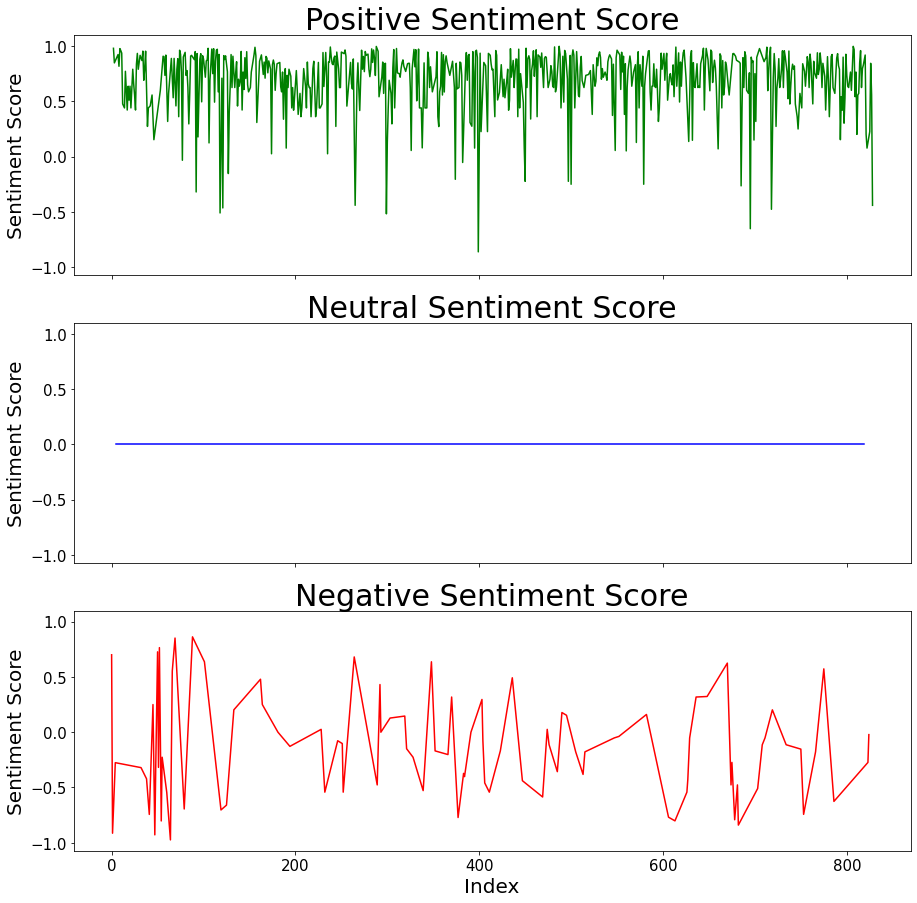

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sentiment_scores(df):
    # Convert the sentiment score column to numeric
    df["sentiment_score"] = pd.to_numeric(df["sentiment_score"], errors='coerce')
    
    # Remove the rows with non-numeric values
    df.dropna(subset=["sentiment_score"], inplace=True)
    
    # Create three separate dataframes for the positive, neutral, and negative labels
    df_positive = df[df["label"] == "positive"]
    df_neutral = df[df["label"] == "neutral"]
    df_negative = df[df["label"] == "negative"]
    
    # Plot the sentiment scores for each label
    fig, ax = plt.subplots(3, figsize=(15,15), sharex=True, sharey=True)
    
    df_positive["sentiment_score"].plot(kind='line', ax=ax[0], color='green')
    ax[0].set_ylabel("Sentiment Score", fontsize=20)
    ax[0].set_title("Positive Sentiment Score", fontsize=30)
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    
    df_neutral["sentiment_score"].plot(kind='line', ax=ax[1], color='blue')
    ax[1].set_ylabel("Sentiment Score", fontsize=20)
    ax[1].set_title("Neutral Sentiment Score", fontsize=30)
    ax[1].tick_params(axis='both', which='major', labelsize=15)
    
    df_negative["sentiment_score"].plot(kind='line', ax=ax[2], color='red')
    ax[2].set_ylabel("Sentiment Score", fontsize=20)
    ax[2].set_title("Negative Sentiment Score", fontsize=30)
    ax[2].set_xlabel("Index", fontsize=20)
    ax[2].tick_params(axis='both', which='major', labelsize=15)
    
    plt.show()

plot_sentiment_scores(df)


In [40]:
df.to_csv('sent_prepro_nike.csv',index=False)

In [41]:
df_n=pd.read_csv('nike_feedback.csv')

In [42]:
df_n.head(),  df_n.size

(                                            feedback
 0  Good comfort.. Good Quality... but i doubt Wea...
 1  So I thought of buying this new shoe (supposed...
 2  This is a really good product by Nike. Very co...
 3  This is a very comfortable shoe to wear,which ...
 4  Pleae dont buy, neither looks like a Nike shoe...,
 829)

In [43]:
#applying edge case filter
df_n = df_n[~df_n['feedback'].apply(lambda x: any([keyword in x for keyword in irrrelevant_keywords]))]

In [44]:
df_n.reset_index(drop=True)

,feedback
0,Good comfort.. Good Quality... but i doubt Wea...
1,So I thought of buying this new shoe (supposed...
2,This is a really good product by Nike. Very co...
3,"This is a very comfortable shoe to wear,which ..."
4,"Pleae dont buy, neither looks like a Nike shoe..."
...,...
806,Earlier I have placed serveral orders from the...
807,Couldn't believe it when somebody designed me ...
808,I ordered some items which unfortunately did n...
809,"Recieved a fantastic pair of trainers here , w..."


In [45]:
f=df_n['feedback']

In [46]:
f.size

811

**CREATING TARGET LABEL/MASKED**

#apply on our dataframe
#Stop words are commonly used words that are often removed from 
#text data as they carry little meaning and can contribute 
#to the curse of dimensionality in certain NLP tasks. 
#but we are removing it as our 1st experiment tos see how model works 
#but it could also result in losing important information if 
#the masked word is a stop word.
#2nd possible
#On the other hand, if stop words are not removed, the model may be 
#overburdened by the additional noise and may not perform as well 
#as it could with reduced data.

# ****1st case preprocess/remove stop word/lower/remove no****

In [47]:
def prepro_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    #split it in word
    text=text.split(' ')

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words2 = [word for word in text if word not in stop_words]

    # Remove numbers
    words = [word for word in words2 if not word.isdigit()]

    # Join the words back into a single string
    preprocessed_text = " ".join(words)

    return preprocessed_text


In [48]:
df_n['feedback']=df_n['feedback'].apply(prepro_text)

In [49]:
f=df_n['feedback']

In [50]:
f.head()

0    good comfort good quality doubt weather fabric...
1    thought buying new shoe supposedly new shoe gu...
2    really good product nike comfortable wear look...
3    comfortable shoe wearwhich made good quality l...
4    pleae dont buy neither looks like nike shoes  ...
Name: feedback, dtype: object

In [51]:
#A FUNCTION FOR AUTAMATIC TASK OF CREATING SINGLE MASKED WORD IN EACH TEXT/ROW OF FEED
#BACK FEATURE
import random
def mask_text(text):
    #splitting it in word
    words = text.split()
    #random masked word
    masked_word = random.choice(words)
    #replace this word to the [Masked]
    masked_text = text.replace(masked_word, '[Mask]')
    #create target column having corresponding masked word
    target = masked_word
    return masked_text, target



In [52]:
df_n['masked_text'], df_n['target_word'] = zip(*df_n['feedback'].apply(mask_text))



In [53]:
df_n[['masked_text','target_word']]

,masked_text,target_word
0,[Mask] comfort [Mask] quality doubt weather fa...,good
1,thought buying new shoe supposedly new shoe gu...,near
2,really [Mask] product nike comfortable wear lo...,good
3,comfortable shoe wearwhich made good quality l...,attracts
4,pleae dont buy neither looks like nike shoes ...,cheap
...,...,...
824,earlier [Mask] serveral orders nikestoredk web...,placed
825,couldnt believe somebody designed trainers ord...,accepted
826,[Mask]ed items unfortunately fit nike gave ful...,order
827,recieved fantastic pair [Mask] brand,trainers


In [54]:
#duplicate feedback check
duplicates = df_n.duplicated(subset='masked_text')
duplicated_indexes = df_n[duplicates].index
duplicated_indexes


Int64Index([16, 18, 22, 594], dtype='int64')

In [55]:
for i in duplicated_indexes:
    print(df_n['feedback'][i])
    print(df_n['masked_text'][i])

brilliant
[Mask]
love
[Mask]
awesome product
[Mask] product
amazing shoes
[Mask] shoes


In [56]:
duplicates = df_n.duplicated(subset='feedback')
duplicated_indexes = df_n[duplicates].index
duplicated_indexes

Int64Index([210], dtype='int64')

In [57]:
for i in duplicated_indexes:
    print(df_n['feedback'][i])
    print(df_n['masked_text'][i])

order package came time everything right
order package came time [Mask] right


# 1. by analyzing above there is not any duplicate row

In [58]:
#df_n= df_n.drop_duplicates(subset='masked_text', keep='first')


In [59]:
df_n.columns

Index(['feedback', 'masked_text', 'target_word'], dtype='object')

we need only masked text and target word

In [60]:
df_masked=df_n[['masked_text','target_word']]

In [61]:
df_masked

,masked_text,target_word
0,[Mask] comfort [Mask] quality doubt weather fa...,good
1,thought buying new shoe supposedly new shoe gu...,near
2,really [Mask] product nike comfortable wear lo...,good
3,comfortable shoe wearwhich made good quality l...,attracts
4,pleae dont buy neither looks like nike shoes ...,cheap
...,...,...
824,earlier [Mask] serveral orders nikestoredk web...,placed
825,couldnt believe somebody designed trainers ord...,accepted
826,[Mask]ed items unfortunately fit nike gave ful...,order
827,recieved fantastic pair [Mask] brand,trainers


In [62]:
df_masked.reset_index(drop=True)

,masked_text,target_word
0,[Mask] comfort [Mask] quality doubt weather fa...,good
1,thought buying new shoe supposedly new shoe gu...,near
2,really [Mask] product nike comfortable wear lo...,good
3,comfortable shoe wearwhich made good quality l...,attracts
4,pleae dont buy neither looks like nike shoes ...,cheap
...,...,...
806,earlier [Mask] serveral orders nikestoredk web...,placed
807,couldnt believe somebody designed trainers ord...,accepted
808,[Mask]ed items unfortunately fit nike gave ful...,order
809,recieved fantastic pair [Mask] brand,trainers


In [63]:
def get_text_length(text):
    return len(text.split())

df_masked['text_length'] = df_masked['masked_text'].apply(get_text_length)


In [64]:
df_masked.shape

(811, 3)

In [65]:

df_masked=df_masked[['masked_text','target_word']]


In [66]:
df_masked.head()

,masked_text,target_word
0,[Mask] comfort [Mask] quality doubt weather fa...,good
1,thought buying new shoe supposedly new shoe gu...,near
2,really [Mask] product nike comfortable wear lo...,good
3,comfortable shoe wearwhich made good quality l...,attracts
4,pleae dont buy neither looks like nike shoes ...,cheap


In [67]:
#save for future use
df_masked.to_csv('masked_nike.csv',index=False)

In [68]:
df_m=pd.read_csv('masked_nike.csv')

In [69]:
df_m

,masked_text,target_word
0,[Mask] comfort [Mask] quality doubt weather fa...,good
1,thought buying new shoe supposedly new shoe gu...,near
2,really [Mask] product nike comfortable wear lo...,good
3,comfortable shoe wearwhich made good quality l...,attracts
4,pleae dont buy neither looks like nike shoes ...,cheap
...,...,...
806,earlier [Mask] serveral orders nikestoredk web...,placed
807,couldnt believe somebody designed trainers ord...,accepted
808,[Mask]ed items unfortunately fit nike gave ful...,order
809,recieved fantastic pair [Mask] brand,trainers


step for building model
1. Preprocess our text data: Convert the text into a format suitable for fine-tuning, such as converting all text to lowercase, removing stop words/depends on use case, punctuation and special characters, etc.

2. Mask the text: Replace a word in the text with the [Mask] placeholder to create a masked sequence. we can choose to mask a random word in each sequence or mask a specific word based on your task.

3. Create the target column: Create a target column that contains the masked word from the text column.

4. Convert the data into a format suitable for fine-tuning: Convert the text and target columns into numerical data suitable for fine-tuning the model.

5. Split the data into train, validation, and test sets: Split the preprocessed and converted data into three sets: training, validation, and testing.

6. Load the distilbert-based-uncased model: Load the pre-trained distilbert-based-uncased model from the transformers library.

7. Fine-tune the model: Train the model on the training data and use the validation data to adjust the model parameters for optimal performance.

8. Evaluate the model: Use the test data to evaluate the model's performance and make any necessary adjustments.

9. Save the fine-tuned model: Save the fine-tuned model for future use.